<a href="https://colab.research.google.com/github/igor531205/PPE/blob/main/PPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм.***

### Практическая работа по обнаружению средств индивидуальной защиты в промышленности с использованием компьютерного зрения.

---

*Установим Ultralytics.*

In [1]:
!pip install -U -q ultralytics

*Подключим Google Drive.*

In [2]:
from google.colab import drive
from google.colab.patches import cv2_imshow

# Mount Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Загрузим предобученную модель YOLOv8 Extra Large.*

In [3]:
from ultralytics import YOLO

# Download pretrained model YOLO.
model_path = 'yolo11x.pt'
model = YOLO(model=model_path, task='detect')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 109M/109M [00:00<00:00, 118MB/s]


*Посмотрим архитектуру модели YOLOv8 Extra Large.*

In [ ]:
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
   

Архитектура модели YOLOv11 Extra Large:

*   Backbone - с 0 по 10 слой;
*   Neck - с 11 по 22 слой;
*   Head - 23 слой.

*Настроим гиперпараметры.*

In [5]:
epochs = 50 # Total number of training epochs.
batch = 32 # Batch size for training. -1
imgsz = 640 #Target image size for training. 640 or 1920
cache = 'disk' # Enables caching of dataset images in memory or disk.
device = 0 # Specifies the computational device(s) for training.
optimizer = 'AdamW' # Choice of optimizer for training.
freeze = 11 # Freezes the first N layers of the model.
lr0=3e-04 # Initial learning rate.
lrf=1e-03 # Final learning rate = (lr0 * lrf).
momentum = 0.937 # Momentum factor for SGD or beta1 for Adam optimizers.
nbs = 128 # Nominal batch size for normalization of loss.

*Дообучим модель YOLO Extra Large используя Transfer learning (Freeze Backbone) на собственном датасете.*

In [6]:
# Fine-tuning model YOLO.
path_project = '/content/drive/MyDrive/yolo/model'
path_dataset = '/content/drive/MyDrive/yolo/dataset/dataset.yaml'
results = model.train(data=path_dataset,
                      epochs=epochs,
                      cache=cache,
                      batch=batch,
                      device=device,
                      freeze=freeze,
                      imgsz=imgsz,
                      project=path_project,
                      nbs=nbs,
                      optimizer=optimizer,
                      momentum=momentum,
                      lr0=lr0,
                      lrf=lrf
                      )

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo/model/ppe_x.pt, data=/content/drive/MyDrive/yolo/dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=8, project=/content/drive/MyDrive/yolo/model, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=11, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

100%|██████████| 755k/755k [00:00<00:00, 22.9MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768

100%|██████████| 5.35M/5.35M [00:00<00:00, 82.1MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/yolo/dataset/labels/train.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|██████████| 905/905 [00:00<?, ?it/s]


train: 19.6GB disk space required, with 50% safety margin but only 6.0/15.0GB free, not caching images to disk ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolo/dataset/labels/valid.cache... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]
val: Caching images (1.5GB Disk): 100%|██████████| 118/118 [00:00<00:00, 770.76it/s]


Plotting labels to /content/drive/MyDrive/yolo/model/train/labels.jpg... 
optimizer: AdamW(lr=0.0003, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo/model/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.5G     0.5512     0.3832     0.9407         85        640: 100%|██████████| 29/29 [02:01<00:00,  4.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]

                   all        118        808      0.755      0.744      0.786      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.3G     0.5325     0.3543      0.919        103        640: 100%|██████████| 29/29 [01:19<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]

                   all        118        808      0.791       0.74        0.8      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.5G     0.5294     0.3483     0.9321         85        640: 100%|██████████| 29/29 [01:16<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        118        808      0.799       0.76      0.812      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.3G     0.5242     0.3428      0.923         92        640: 100%|██████████| 29/29 [01:20<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.40s/it]

                   all        118        808      0.787      0.767      0.818      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.3G     0.5059     0.3326     0.9108        108        640: 100%|██████████| 29/29 [01:19<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        118        808      0.799      0.769      0.827      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.3G     0.5129      0.337     0.9223        103        640: 100%|██████████| 29/29 [01:21<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        118        808      0.769      0.805       0.82       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.3G     0.4855     0.3136     0.8967         79        640: 100%|██████████| 29/29 [01:26<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        118        808      0.808      0.783      0.828      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.5G     0.5016     0.3237     0.9079         84        640: 100%|██████████| 29/29 [01:24<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  2.00s/it]

                   all        118        808      0.801      0.795      0.824      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.4G      0.496     0.3166     0.9053        121        640: 100%|██████████| 29/29 [01:21<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        118        808       0.79      0.783      0.821      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.6G     0.5036     0.3253     0.9047         68        640: 100%|██████████| 29/29 [01:20<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        118        808      0.802      0.772      0.821      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.5G     0.4833     0.3131     0.9053         59        640: 100%|██████████| 29/29 [01:24<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all        118        808      0.824      0.774       0.83      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.5G     0.4966     0.3162     0.9075         79        640: 100%|██████████| 29/29 [01:22<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.32s/it]

                   all        118        808      0.819      0.782      0.831      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.4G     0.4734     0.2998     0.8941         55        640: 100%|██████████| 29/29 [01:19<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.28s/it]

                   all        118        808      0.828      0.776      0.832      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.5G     0.4857     0.3145     0.8972         86        640: 100%|██████████| 29/29 [01:24<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.21s/it]

                   all        118        808      0.805      0.795      0.833      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.5G     0.4802     0.3096     0.8863         84        640: 100%|██████████| 29/29 [01:19<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]

                   all        118        808        0.8      0.811      0.838      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.5G     0.4775     0.3066     0.8926         72        640: 100%|██████████| 29/29 [01:25<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        118        808      0.844      0.778      0.837      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.4G     0.4648     0.2978     0.8913        109        640: 100%|██████████| 29/29 [01:23<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.43s/it]

                   all        118        808      0.832      0.779      0.832      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.5G     0.4635     0.3012     0.8907         83        640: 100%|██████████| 29/29 [01:26<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        118        808      0.818      0.799      0.837       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.5G     0.4703     0.3031     0.8935         88        640: 100%|██████████| 29/29 [01:27<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all        118        808      0.821      0.787      0.837       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.5G     0.4676     0.2958     0.8901         92        640: 100%|██████████| 29/29 [01:17<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.35s/it]

                   all        118        808      0.829      0.794      0.839      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.4G     0.4506     0.2871      0.881         82        640: 100%|██████████| 29/29 [01:26<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.25s/it]

                   all        118        808      0.827      0.794      0.834      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.5G     0.4497      0.289     0.8744         93        640: 100%|██████████| 29/29 [01:21<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.31s/it]

                   all        118        808      0.842      0.769      0.835      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.5G     0.4569     0.2923     0.8817        110        640: 100%|██████████| 29/29 [01:19<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]

                   all        118        808       0.84      0.773      0.837      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.5G     0.4534     0.2842     0.8787         70        640: 100%|██████████| 29/29 [01:23<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.56s/it]

                   all        118        808      0.846      0.777      0.835      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.4G     0.4522     0.2866     0.8842         55        640: 100%|██████████| 29/29 [01:16<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        118        808      0.833      0.788      0.836      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.5G     0.4446     0.2814     0.8778         83        640: 100%|██████████| 29/29 [01:20<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.58s/it]

                   all        118        808      0.849      0.784      0.842      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.5G     0.4511      0.284     0.8812         75        640: 100%|██████████| 29/29 [01:21<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.45s/it]

                   all        118        808      0.852      0.772      0.838      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.3G     0.4349     0.2808     0.8706         93        640: 100%|██████████| 29/29 [01:28<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all        118        808      0.801      0.812      0.839      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.4G      0.444     0.2841     0.8821         82        640: 100%|██████████| 29/29 [01:24<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        118        808      0.824      0.798      0.843      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.5G     0.4433     0.2794     0.8768         56        640: 100%|██████████| 29/29 [01:23<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]

                   all        118        808      0.825       0.79      0.841      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.5G     0.4358     0.2722     0.8658         97        640: 100%|██████████| 29/29 [01:24<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]

                   all        118        808      0.789      0.813      0.838      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.5G     0.4344     0.2738     0.8736        104        640: 100%|██████████| 29/29 [01:23<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]

                   all        118        808      0.821      0.794       0.84      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.4G     0.4205     0.2659     0.8651         74        640: 100%|██████████| 29/29 [01:21<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]

                   all        118        808      0.792      0.818      0.841      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.5G     0.4271     0.2671     0.8772         72        640: 100%|██████████| 29/29 [01:21<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

                   all        118        808      0.833      0.784      0.842      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.5G     0.4242     0.2676     0.8691         85        640: 100%|██████████| 29/29 [01:20<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.42s/it]

                   all        118        808      0.816      0.806      0.843      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.3G     0.4209     0.2603      0.867         63        640: 100%|██████████| 29/29 [01:21<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.45s/it]

                   all        118        808      0.825        0.8      0.843      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.4G     0.4186     0.2633      0.863         95        640: 100%|██████████| 29/29 [01:25<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        118        808      0.825      0.807      0.848       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.5G     0.4228     0.2662     0.8731         70        640: 100%|██████████| 29/29 [01:28<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        118        808       0.85      0.785      0.846      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.5G     0.4165      0.258     0.8615         95        640: 100%|██████████| 29/29 [01:26<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.62s/it]

                   all        118        808       0.83      0.801      0.847      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.5G     0.4186     0.2611      0.863         97        640: 100%|██████████| 29/29 [01:21<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.31s/it]

                   all        118        808      0.816      0.812      0.848      0.663


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.4G     0.4121     0.2494     0.8369         44        640: 100%|██████████| 29/29 [01:31<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        118        808      0.818      0.807      0.843      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.5G     0.4139     0.2488     0.8501         38        640: 100%|██████████| 29/29 [01:21<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        118        808      0.816      0.794       0.84      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.3G     0.4087      0.244     0.8367         37        640: 100%|██████████| 29/29 [01:19<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.40s/it]

                   all        118        808      0.828       0.79       0.84      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.5G     0.3931     0.2366     0.8228         39        640: 100%|██████████| 29/29 [01:18<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all        118        808      0.843      0.784      0.838      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.4G        0.4     0.2385     0.8343         46        640: 100%|██████████| 29/29 [01:22<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]

                   all        118        808      0.843      0.784      0.838      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.5G        0.4     0.2374     0.8286         49        640: 100%|██████████| 29/29 [01:19<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.64s/it]

                   all        118        808      0.843      0.787      0.837      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.5G     0.4003     0.2369     0.8401         51        640: 100%|██████████| 29/29 [01:22<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.22s/it]

                   all        118        808      0.836      0.796      0.838      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.5G     0.3879      0.233     0.8287         37        640: 100%|██████████| 29/29 [01:24<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.51s/it]

                   all        118        808      0.854      0.775      0.837      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      12.4G     0.3943     0.2337     0.8278         41        640: 100%|██████████| 29/29 [01:25<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]

                   all        118        808      0.826      0.793      0.838      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      12.5G     0.3814     0.2298     0.8242         53        640: 100%|██████████| 29/29 [01:27<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.47s/it]

                   all        118        808      0.849      0.786      0.839      0.657



50 epochs completed in 1.321 hours.
Optimizer stripped from /content/drive/MyDrive/yolo/model/train/weights/last.pt, 114.4MB
Optimizer stripped from /content/drive/MyDrive/yolo/model/train/weights/best.pt, 114.4MB

Validating /content/drive/MyDrive/yolo/model/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11x summary (fused): 464 layers, 56,838,574 parameters, 0 gradients, 194.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.69s/it]


                   all        118        808      0.819      0.811      0.848      0.663
                Person        118        225      0.962      0.987      0.993      0.916
                  MEWP         32         36      0.957          1      0.995      0.987
                  Vest         39         74      0.944      0.918       0.97      0.752
                Helmet         87        141      0.968      0.957      0.983      0.834
                 Boots         63        175      0.904      0.931      0.953      0.626
               Glasses         30         49      0.814      0.715      0.853      0.451
               Harness         47         54      0.908      0.907      0.953      0.714
                  Mask          7         14      0.824          1      0.995      0.833
                Gloves         23         39      0.906      0.692      0.784      0.522
              Headsets          1          1          0          0          0          0
Speed: 0.2ms preproce

*Выведем метрики, полученные при обучении и валидации.*

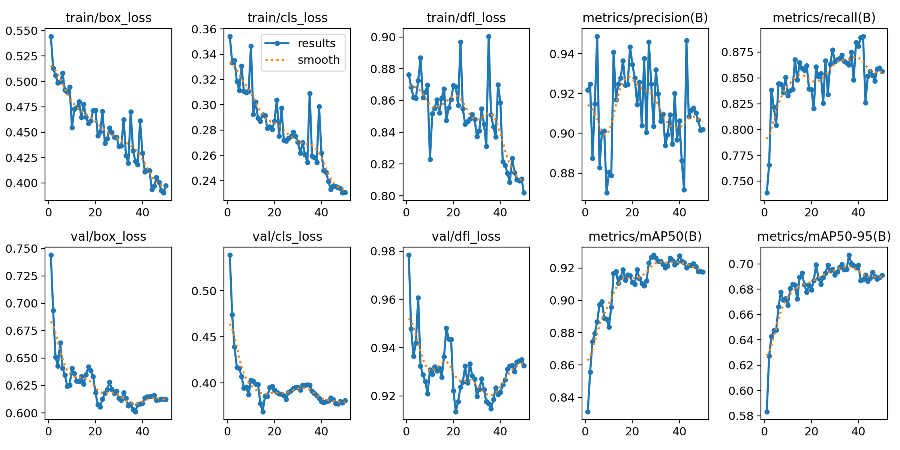

In [ ]:
import cv2

# Output of results.
img = cv2.imread('/content/drive/MyDrive/yolo/model/train_x/results.png')
img = cv2.resize(img, (900, 450))
cv2_imshow(img)

box_loss. Потери на обучающем и валидационном наборе для координат ограничивающих рамок (bounding boxes).

cls_loss. Потери на обучающем и валидационном наборе для классификации объектов.

dfl_loss. Потери на обучающем и валидационном наборе для распределенной вероятности рамок (distributional focal loss).

Потери на обучающем наборе уменьшаются, что является признаком хорошей сходимости модели. А уменьшение потерь на валидационном наборе указывает на отсутствие переобучения.

metrics/precision(B). Метрика точности (precision) модели на валидационном наборе. Показывает колебания, но в целом модель правильно идентифицирует объекты среди тех, которые она обнаруживает.

metrics/recall(B). Метрика полноты (recall) модели на валидационном наборе. Показывает увеличение, модель находит большинство объектов.

metrics/mAP50(B). Средняя точность при 50% пороге (mean Average Precision at IoU 50%) на валидационном наборе.

metrics/mAP50-95(B). Средняя точность при различных порогах от 50% до 95% (mean Average Precision at IoU 50 to 95%) на валидационном наборе.

Метрики mAP увеличиваются, что показывает улучшение производительности модели и точности при различных порогах IoU.


*Выведим кривые зависимости метрик, полученные при обучении и валидации.*

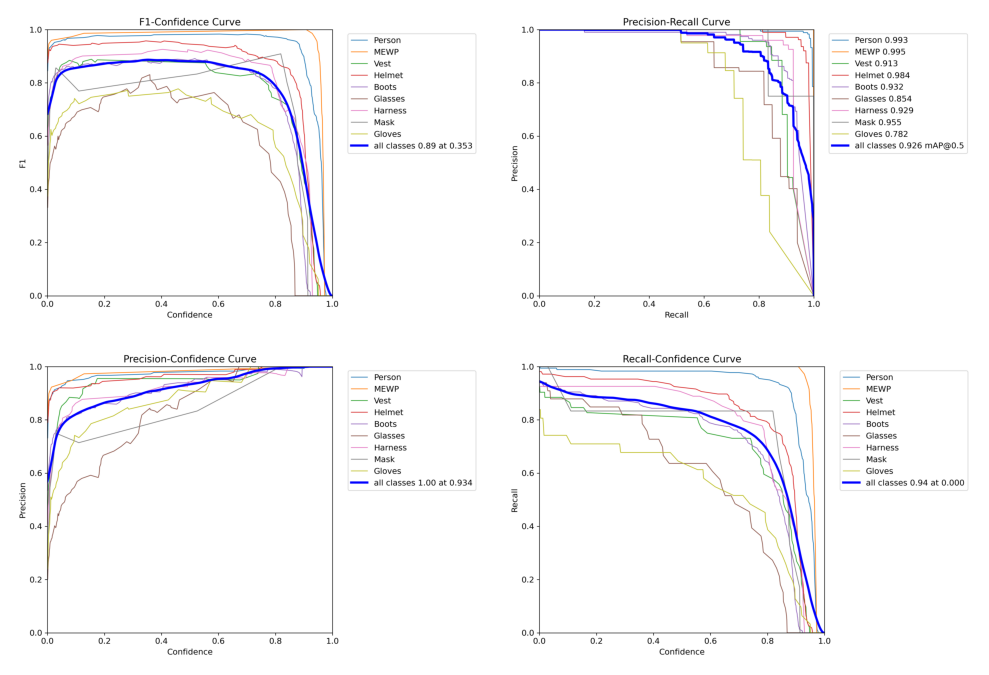

In [ ]:
import matplotlib.pyplot as plt

# Create paths to results.
image_paths = ['/content/drive/MyDrive/yolo/model/train_x/F1_curve.png',
               '/content/drive/MyDrive/yolo/model/train_x/PR_curve.png',
               '/content/drive/MyDrive/yolo/model/train_x/P_curve.png',
               '/content/drive/MyDrive/yolo/model/train_x/R_curve.png',
               ]

# Create a grid to display results.
n_rows = int(len(image_paths) / 2)
n_cols = 2
plt.figure(figsize=(10, 7))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()

F1-Confidence Curve. F1 мера учитывает как точность (precision), так и полноту (recall). Для каждого класса отображается своя кривая, а также агрегированное значение для всех классов. Видно, что для большинства классов F1 мера высока, что говорит о хорошей сбалансированности между точностью и полнотой.

Precision-Recall Curve. Кривая зависимости точности (precision) от полноты (recall). Эта кривая показывает, насколько хорошо модель распознает все объекты (полнота) при различных уровнях точности. Чем больше площадь под кривой (AUC), тем лучше модель. Видно, что для некоторых классов показатели очень высоки.

Precision-Confidence Curve. Кривая зависимости точности (precision) от уровня уверенности (confidence). Чем выше уверенность модели, тем выше точность.

Recall-Confidence Curve. Кривая зависимости полноты (recall) от уровня уверенности (confidence). Чем выше уверенность, тем ниже полнота, так как модель становится более избирательной и может пропускать некоторые объекты.

В целом модель демонстрирует хорошую производительность.


*Произведем аннотацию дополнительных изображений для датасета используя модель YOLO Extra Large.*

In [ ]:
# Use a trained model to run predictions on images with annotation.
results = model('/content/drive/MyDrive/yolo/images', save_txt=True, project='/content/drive/MyDrive/yolo/images')


image 1/607 /content/drive/MyDrive/yolo/images/Камера 56_02_10_2024 09.28.51 - frame at 0m17s.jpg: 384x640 1 Person, 1 Helmet, 1 Boots, 1 Harness, 121.7ms
image 2/607 /content/drive/MyDrive/yolo/images/Камера 56_02_10_2024 09.28.51 - frame at 0m19s.jpg: 384x640 1 Person, 1 Helmet, 1 Boots, 2 Harnesss, 63.1ms
image 3/607 /content/drive/MyDrive/yolo/images/Камера 56_02_10_2024 09.28.51 - frame at 0m21s.jpg: 384x640 1 Person, 1 Helmet, 2 Bootss, 2 Harnesss, 63.1ms
image 4/607 /content/drive/MyDrive/yolo/images/Камера 56_02_10_2024 09.33.13 - frame at 0m27s.jpg: 384x640 2 Persons, 1 Vest, 2 Helmets, 1 Boots, 2 Harnesss, 63.0ms
image 5/607 /content/drive/MyDrive/yolo/images/Камера 56_02_10_2024 09.33.13 - frame at 0m28s.jpg: 384x640 2 Persons, 1 Vest, 2 Helmets, 3 Bootss, 2 Harnesss, 63.0ms
image 6/607 /content/drive/MyDrive/yolo/images/Камера 56_02_10_2024 09.33.13 - frame at 0m29s.jpg: 384x640 2 Persons, 1 Vest, 2 Helmets, 3 Bootss, 2 Harnesss, 63.0ms
image 7/607 /content/drive/MyDrive/y

In [7]:
path = '/content/drive/MyDrive/yolo/model/ppe_x.pt'
model.save(filename=path)

*Настроим гиперпараметры.*

In [ ]:
epochs = 50 # Total number of training epochs.
batch = 32 # Batch size for training. -1
imgsz = 640 #Target image size for training. 640 or 1920
cache = 'disk' # Enables caching of dataset images in memory or disk.
device = 0 # Specifies the computational device(s) for training.
optimizer = 'AdamW' # Choice of optimizer for training.
freeze = 11 # Freezes the first N layers of the model.
lr0 = 3e-04 # Initial learning rate.
lrf = 1e-03 # Final learning rate = (lr0 * lrf).
momentum = 0.937 # Momentum factor for SGD or beta1 for Adam optimizers.
nbs = 128 # Nominal batch size for normalization of loss.
profile = True

*Загрузим предобученную модель YOLOv8 Nano.*

In [ ]:
# Download pretrained model YOLO.
model_path = 'yolo11n.pt'
model = YOLO(model=model_path, task='detect')

*Посмотрим архитектуру модели YOLOv8 Nano.*

In [ ]:
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0): Bottleneck(
          (cv1): Conv(
            (conv): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (3): Conv(
      (conv): Conv2d(64,

Архитектура модели YOLOv11 Nano:

*   Backbone - с 0 по 10 слой;
*   Neck - с 11 по 22 слой;
*   Head - 23 слой.

*Дообучим модель YOLO Nano используя Transfer learning (Freeze Backbone) на собственном датасете.*

In [ ]:
# Fine-tuning model YOLO.
path_project = '/content/drive/MyDrive/yolo/model'
path_dataset = '/content/drive/MyDrive/yolo/dataset/dataset.yaml'
results = model.train(
    data=path_dataset,
    epochs=epochs,
    cache=cache,
    batch=batch,
    device=device,
    freeze=freeze,
    imgsz=imgsz,
    project=path_project,
    nbs=nbs,
    optimizer=optimizer,
    momentum=momentum,
    lr0=lr0,
    lrf=lrf,
    profile=profile
    )

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo/model/ppe_n.pt, data=/content/drive/MyDrive/yolo/dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=156, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=8, project=/content/drive/MyDrive/yolo/model, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=True, freeze=11, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

train: Scanning /content/drive/MyDrive/yolo/dataset/labels/train.cache... 905 images, 0 backgrounds, 0 corrupt: 100%|██████████| 905/905 [00:00<?, ?it/s]


train: 19.6GB disk space required, with 50% safety margin but only 3.9/15.0GB free, not caching images to disk ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolo/dataset/labels/valid.cache... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]
val: Caching images (1.5GB Disk): 100%|██████████| 118/118 [00:00<00:00, 1333.71it/s]


Plotting labels to /content/drive/MyDrive/yolo/model/train/labels.jpg... 
optimizer: AdamW(lr=0.0003, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000609375), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo/model/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.9G      1.027      1.088      1.048       1164        640: 100%|██████████| 6/6 [01:39<00:00, 16.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]

                   all        118        808      0.875      0.365      0.425      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.4G      1.026      1.001      1.025       1075        640: 100%|██████████| 6/6 [01:05<00:00, 10.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]

                   all        118        808      0.796      0.354      0.398      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.5G     0.9893     0.9669      1.039       1155        640: 100%|██████████| 6/6 [00:48<00:00,  8.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]


                   all        118        808      0.732      0.389      0.415      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.1G      0.982     0.9325      1.025       1176        640: 100%|██████████| 6/6 [00:42<00:00,  7.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all        118        808      0.744      0.387      0.426      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.3G     0.9825      0.938      1.024       1135        640: 100%|██████████| 6/6 [00:31<00:00,  5.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]

                   all        118        808       0.72      0.354      0.411      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.4G     0.9855      0.932      1.027       1263        640: 100%|██████████| 6/6 [00:21<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]

                   all        118        808      0.765      0.359       0.44      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.4G     0.9489        0.9      1.009       1308        640: 100%|██████████| 6/6 [00:26<00:00,  4.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all        118        808      0.744      0.376      0.439      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.1G     0.9517     0.8773       1.01       1232        640: 100%|██████████| 6/6 [00:27<00:00,  4.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]

                   all        118        808      0.754       0.37      0.472      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.3G     0.9384     0.8686      1.002       1338        640: 100%|██████████| 6/6 [00:21<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]

                   all        118        808      0.753      0.415      0.471      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.4G      0.951     0.8741      1.016       1168        640: 100%|██████████| 6/6 [00:25<00:00,  4.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all        118        808      0.878      0.426      0.475      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.3G     0.9534     0.8483      1.003       1252        640: 100%|██████████| 6/6 [00:24<00:00,  4.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


                   all        118        808      0.791      0.448      0.481      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.5G     0.9387     0.8321     0.9916       1321        640: 100%|██████████| 6/6 [00:22<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]

                   all        118        808      0.805      0.446       0.49      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.3G      0.939     0.8456       1.01       1169        640: 100%|██████████| 6/6 [00:24<00:00,  4.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]


                   all        118        808       0.86      0.454      0.502      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        12G     0.9323     0.8269     0.9984       1339        640: 100%|██████████| 6/6 [00:23<00:00,  3.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all        118        808      0.855      0.461       0.51      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.9G     0.9466     0.8173     0.9904       1168        640: 100%|██████████| 6/6 [00:24<00:00,  4.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all        118        808      0.791      0.457      0.516      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.3G     0.9153      0.801     0.9925        991        640: 100%|██████████| 6/6 [00:24<00:00,  4.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all        118        808      0.897      0.451      0.555       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.4G     0.9293     0.7942     0.9947       1284        640: 100%|██████████| 6/6 [00:26<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all        118        808      0.615      0.505      0.561      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.4G     0.9185     0.7918     0.9862       1228        640: 100%|██████████| 6/6 [00:24<00:00,  4.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all        118        808      0.627      0.514       0.57      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.4G     0.9204     0.7869     0.9909       1227        640: 100%|██████████| 6/6 [00:22<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]

                   all        118        808      0.641      0.532      0.582      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.3G     0.8983      0.762     0.9758       1226        640: 100%|██████████| 6/6 [00:24<00:00,  4.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]

                   all        118        808      0.658       0.53      0.585      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.3G      0.897     0.7467     0.9735       1171        640: 100%|██████████| 6/6 [00:22<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]

                   all        118        808      0.665      0.537       0.58      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.4G     0.8903     0.7528     0.9848       1208        640: 100%|██████████| 6/6 [00:24<00:00,  4.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]

                   all        118        808      0.643      0.557       0.59       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.4G     0.8957     0.7444     0.9763       1148        640: 100%|██████████| 6/6 [00:24<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all        118        808      0.647      0.548      0.588      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        12G      0.894     0.7368      0.968       1128        640: 100%|██████████| 6/6 [00:23<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]

                   all        118        808      0.659      0.558      0.618      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.4G     0.8799     0.7345     0.9741       1059        640: 100%|██████████| 6/6 [00:20<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

                   all        118        808      0.671      0.543      0.622      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.4G     0.8753     0.7272     0.9799       1000        640: 100%|██████████| 6/6 [00:23<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]

                   all        118        808      0.668      0.556      0.683      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.5G     0.8674     0.7258     0.9719       1180        640: 100%|██████████| 6/6 [00:17<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]

                   all        118        808      0.665      0.569      0.685      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.4G     0.8679     0.7193     0.9699       1171        640: 100%|██████████| 6/6 [00:22<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all        118        808       0.55      0.615      0.682      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.3G     0.8686     0.7057     0.9687       1294        640: 100%|██████████| 6/6 [00:17<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all        118        808      0.702      0.559      0.694      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.4G     0.8582      0.695     0.9563       1277        640: 100%|██████████| 6/6 [00:21<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all        118        808      0.569      0.624      0.698      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.8G     0.8538     0.6891      0.952       1329        640: 100%|██████████| 6/6 [00:26<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]

                   all        118        808       0.58      0.707      0.699      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.5G     0.8406     0.6973     0.9584       1188        640: 100%|██████████| 6/6 [00:21<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.75s/it]

                   all        118        808      0.717      0.667      0.695      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.5G     0.8489     0.6971     0.9605       1134        640: 100%|██████████| 6/6 [00:22<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

                   all        118        808      0.735      0.658      0.695      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.3G     0.8433     0.6869     0.9583       1271        640: 100%|██████████| 6/6 [00:19<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all        118        808      0.636       0.71      0.706      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        12G     0.8471     0.6833     0.9579       1182        640: 100%|██████████| 6/6 [00:23<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]

                   all        118        808      0.609      0.718      0.702      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.4G     0.8394     0.6917     0.9599       1282        640: 100%|██████████| 6/6 [00:17<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

                   all        118        808      0.617      0.705      0.704      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        12G     0.8383     0.6753     0.9546       1156        640: 100%|██████████| 6/6 [00:20<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]

                   all        118        808      0.728      0.657      0.703      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        12G     0.8331     0.6741     0.9447       1199        640: 100%|██████████| 6/6 [00:17<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all        118        808      0.773      0.648      0.704       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.3G     0.8289     0.6695     0.9542       1120        640: 100%|██████████| 6/6 [00:23<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]

                   all        118        808      0.773      0.646      0.701      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.4G     0.8245     0.6684     0.9521       1082        640: 100%|██████████| 6/6 [00:21<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]

                   all        118        808      0.767      0.652      0.703       0.51


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.9G     0.8058     0.7014     0.9285        676        640: 100%|██████████| 6/6 [01:55<00:00, 19.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all        118        808      0.704      0.662      0.701      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        11G     0.8082     0.6777     0.9369        653        640: 100%|██████████| 6/6 [01:14<00:00, 12.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]

                   all        118        808      0.637      0.701        0.7      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.7G     0.8118     0.6688     0.9286        610        640: 100%|██████████| 6/6 [00:41<00:00,  6.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

                   all        118        808      0.647      0.685        0.7      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.9G     0.8062     0.6603     0.9294        630        640: 100%|██████████| 6/6 [00:32<00:00,  5.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]

                   all        118        808      0.722      0.661      0.702        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.7G     0.8036     0.6523     0.9347        628        640: 100%|██████████| 6/6 [00:19<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

                   all        118        808      0.747       0.64      0.696      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.7G     0.8005     0.6435     0.9271        669        640: 100%|██████████| 6/6 [00:19<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

                   all        118        808      0.726      0.644      0.694      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.7G     0.7939     0.6419     0.9223        638        640: 100%|██████████| 6/6 [00:18<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]

                   all        118        808      0.744      0.636      0.694      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.7G      0.787      0.646     0.9322        634        640: 100%|██████████| 6/6 [00:22<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]

                   all        118        808      0.773      0.633      0.693      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.6G      0.786     0.6347      0.924        642        640: 100%|██████████| 6/6 [00:20<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

                   all        118        808      0.712      0.658      0.693      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.6G     0.7877     0.6392     0.9239        667        640: 100%|██████████| 6/6 [00:17<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]

                   all        118        808      0.709      0.649      0.694      0.495



50 epochs completed in 0.521 hours.
Optimizer stripped from /content/drive/MyDrive/yolo/model/train/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/yolo/model/train/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/yolo/model/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


                   all        118        808      0.705       0.66      0.701       0.51
                Person        118        225      0.921      0.989      0.992      0.849
                  MEWP         32         36      0.952      0.972      0.992      0.923
                  Vest         39         74      0.774       0.73       0.78      0.553
                Helmet         87        141      0.847      0.816       0.88      0.626
                 Boots         63        175      0.674      0.794      0.788      0.403
               Glasses         30         49      0.437      0.237      0.321      0.129
               Harness         47         54      0.602      0.667       0.66      0.408
                  Mask          7         14      0.684      0.214      0.371      0.279
                Gloves         23         39      0.263      0.179      0.236      0.137
              Headsets          1          1      0.899          1      0.995      0.796
Speed: 0.2ms preproce

*Выведем метрики, полученные при обучении и валидации.*

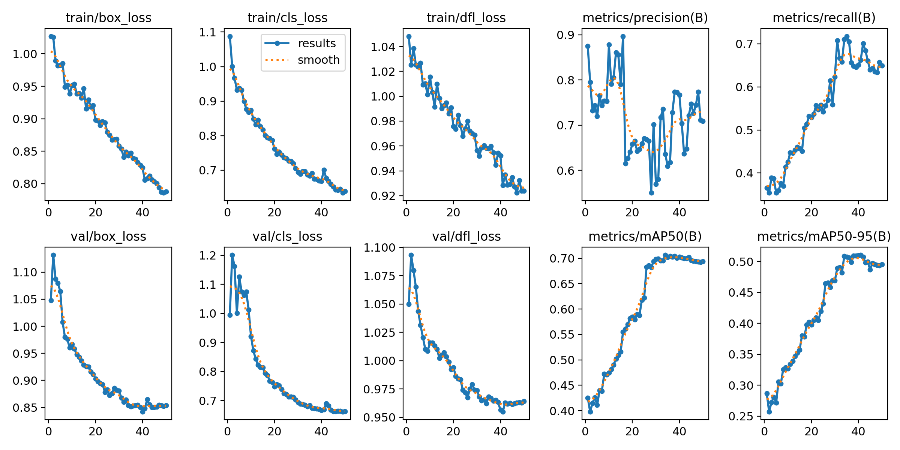

In [ ]:
import cv2

# Output of results.
img = cv2.imread('/content/drive/MyDrive/yolo/model/train_n/results.png')
img = cv2.resize(img, (900, 450))
cv2_imshow(img)

box_loss. Потери на обучающем и валидационном наборе для координат ограничивающих рамок (bounding boxes).

cls_loss. Потери на обучающем и валидационном наборе для классификации объектов.

dfl_loss. Потери на обучающем и валидационном наборе для распределенной вероятности рамок (distributional focal loss).

Потери на обучающем наборе уменьшаются, что является признаком хорошей сходимости модели. А уменьшение потерь на валидационном наборе указывает на отсутствие переобучения.

metrics/precision(B). Метрика точности (precision) модели на валидационном наборе. Показывает колебания, но в целом модель правильно идентифицирует объекты среди тех, которые она обнаруживает.

metrics/recall(B). Метрика полноты (recall) модели на валидационном наборе. Показывает увеличение, модель находит большинство объектов.

metrics/mAP50(B). Средняя точность при 50% пороге (mean Average Precision at IoU 50%) на валидационном наборе.

metrics/mAP50-95(B). Средняя точность при различных порогах от 50% до 95% (mean Average Precision at IoU 50 to 95%) на валидационном наборе.

Метрики mAP увеличиваются, что показывает улучшение производительности модели и точности при различных порогах IoU.


*Выведим кривые зависимости метрик, полученные при обучении и валидации.*

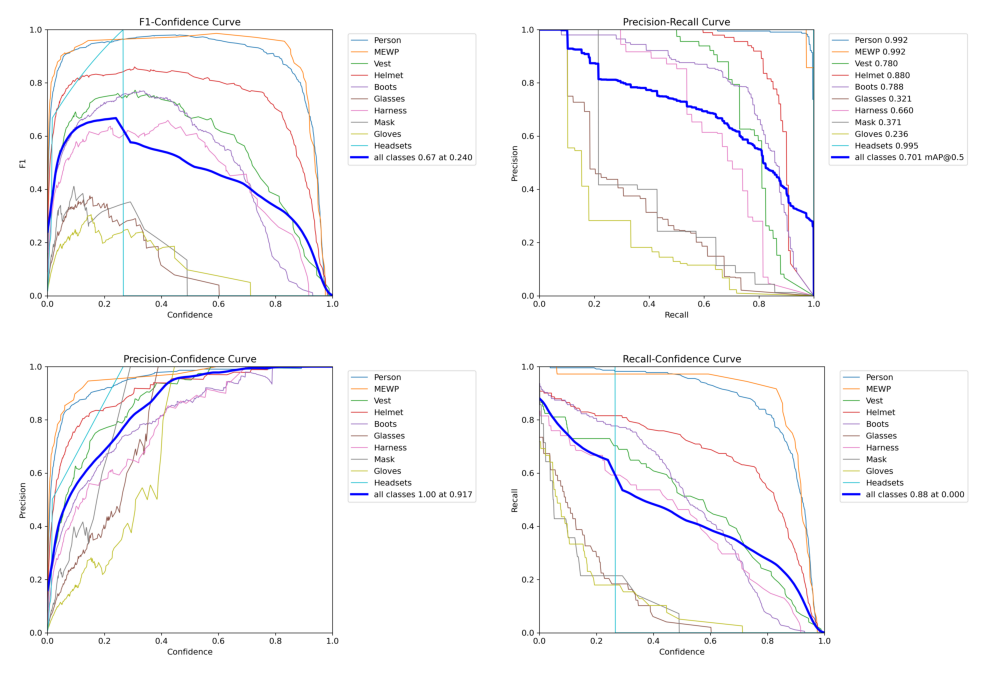

In [ ]:
import matplotlib.pyplot as plt

# Create paths to results.
image_paths = ['/content/drive/MyDrive/yolo/model/train_n/F1_curve.png',
               '/content/drive/MyDrive/yolo/model/train_n/PR_curve.png',
               '/content/drive/MyDrive/yolo/model/train_n/P_curve.png',
               '/content/drive/MyDrive/yolo/model/train_n/R_curve.png',
               ]

# Create a grid to display results.
n_rows = int(len(image_paths) / 2)
n_cols = 2
plt.figure(figsize=(10, 7))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()

F1-Confidence Curve. F1 мера учитывает как точность (precision), так и полноту (recall). Для каждого класса отображается своя кривая, а также агрегированное значение для всех классов. Видно, что для большинства классов F1 мера высока, что говорит о хорошей сбалансированности между точностью и полнотой.

Precision-Recall Curve. Кривая зависимости точности (precision) от полноты (recall). Эта кривая показывает, насколько хорошо модель распознает все объекты (полнота) при различных уровнях точности. Чем больше площадь под кривой (AUC), тем лучше модель. Видно, что для некоторых классов показатели очень высоки.

Precision-Confidence Curve. Кривая зависимости точности (precision) от уровня уверенности (confidence). Чем выше уверенность модели, тем выше точность.

Recall-Confidence Curve. Кривая зависимости полноты (recall) от уровня уверенности (confidence). Чем выше уверенность, тем ниже полнота, так как модель становится более избирательной и может пропускать некоторые объекты.

В целом модель демонстрирует хорошую производительность.


*Произведем детекцию СИЗ и спец.техники на валидационной выборке.*

In [ ]:
# Use a trained model to run predictions on images.
results = model('/content/drive/MyDrive/yolo/dataset/images/valid')


image 1/118 /content/drive/MyDrive/yolo/dataset/images/valid/112_29_10_2024 18.24.00 - frame at 0m8s.jpg: 384x640 2 Persons, 1 Helmet, 2 Bootss, 108.2ms
image 2/118 /content/drive/MyDrive/yolo/dataset/images/valid/112_30_10_2024 08.02.14 - frame at 0m11s.jpg: 384x640 1 Person, 1 Helmet, 1 Boots, 9.9ms
image 3/118 /content/drive/MyDrive/yolo/dataset/images/valid/112_30_10_2024 08.21.55 - frame at 0m7s.jpg: 384x640 2 Persons, 1 Vest, 2 Helmets, 1 Boots, 39.4ms
image 4/118 /content/drive/MyDrive/yolo/dataset/images/valid/21487159874.jpg: 448x640 3 Persons, 3 Vests, 3 Helmets, 5 Bootss, 51.1ms
image 5/118 /content/drive/MyDrive/yolo/dataset/images/valid/56_08_04_2024_07_04_31.jpg: 384x640 1 Person, 2 Vests, 1 Boots, 12.8ms
image 6/118 /content/drive/MyDrive/yolo/dataset/images/valid/56_08_04_2024_07_05_08.jpg: 384x640 2 Persons, 3 Bootss, 1 Glasses, 10.2ms
image 7/118 /content/drive/MyDrive/yolo/dataset/images/valid/56_08_04_2024_07_27_42.jpg: 384x640 2 Persons, 6 Bootss, 9.9ms
image 8/11

*Сохраним результаты на диске.*

In [ ]:
results_count = len(results)

# Save results to files.
for num, result in enumerate(results):
    filename = f'result_foto_{num}.jpg'
    result.save(filename=filename)

*Выведем результаты работы модели из первых 6 файлов.*

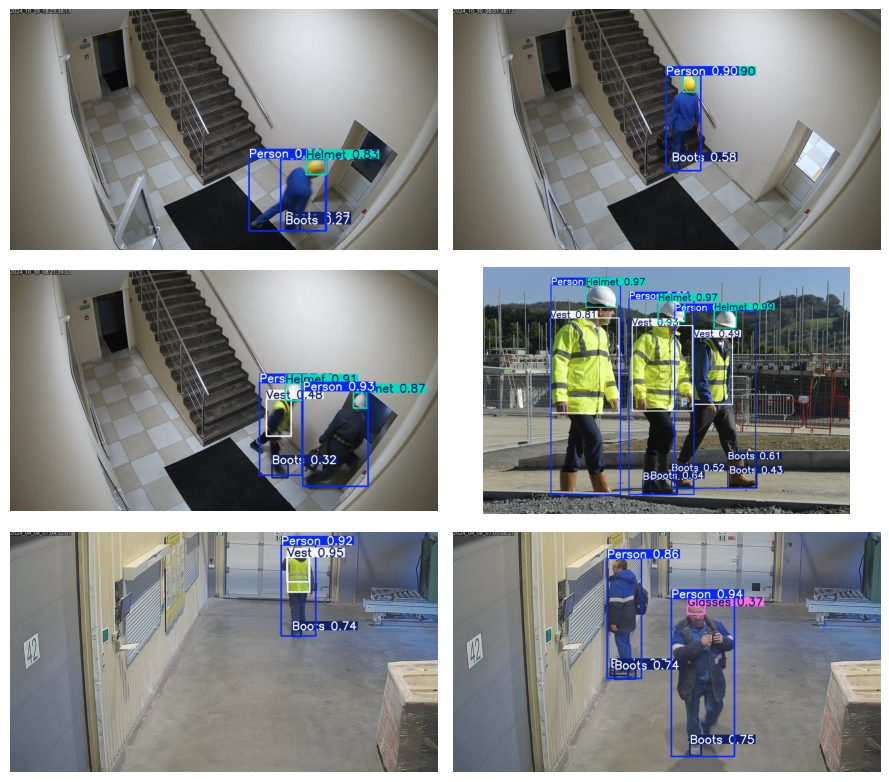

In [ ]:
import cv2
import matplotlib.pyplot as plt

results_count = 6

# Create paths to images.
image_paths = [f'result_foto_{i}.jpg' for i in range(results_count)]

# Create a grid to display results.
n_cols = 2
n_rows = (len(image_paths) + n_cols - 1) // n_cols
plt.figure(figsize=(9, 8))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

if results_count % n_cols != 0:
    for j in range(n_cols - (results_count % n_cols)):
        plt.subplot(n_rows, n_cols, results_count + j + 1)
        plt.axis('off')

plt.tight_layout()
plt.show()

*Выведем результаты работы модели из еще 6 файлов.*

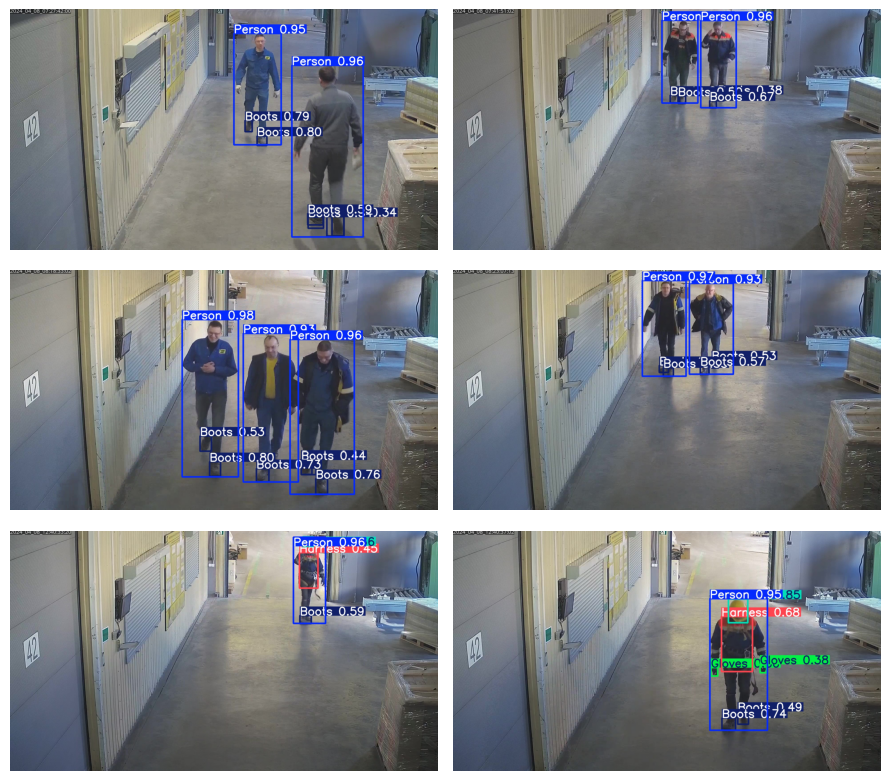

In [ ]:
# Create paths to images.
image_paths = [f'result_foto_{i}.jpg' for i in range(6, 12)]

# Create a grid to display results.
n_cols = 2
n_rows = (len(image_paths) + n_cols - 1) // n_cols
plt.figure(figsize=(9, 8))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

if results_count % n_cols != 0:
    for j in range(n_cols - (results_count % n_cols)):
        plt.subplot(n_rows, n_cols, results_count + j + 1)
        plt.axis('off')

plt.tight_layout()
plt.show()

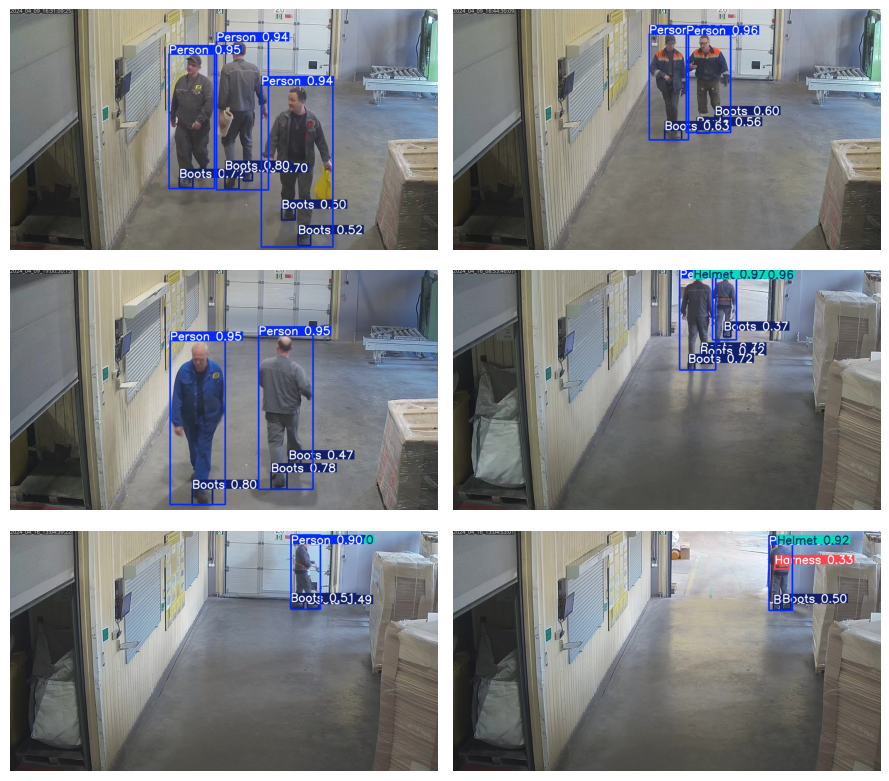

In [ ]:
# Create paths to images.
image_paths = [f'result_foto_{i}.jpg' for i in range(20, 26)]

# Create a grid to display results.
n_cols = 2
n_rows = (len(image_paths) + n_cols - 1) // n_cols
plt.figure(figsize=(9, 8))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

if results_count % n_cols != 0:
    for j in range(n_cols - (results_count % n_cols)):
        plt.subplot(n_rows, n_cols, results_count + j + 1)
        plt.axis('off')

plt.tight_layout()
plt.show()

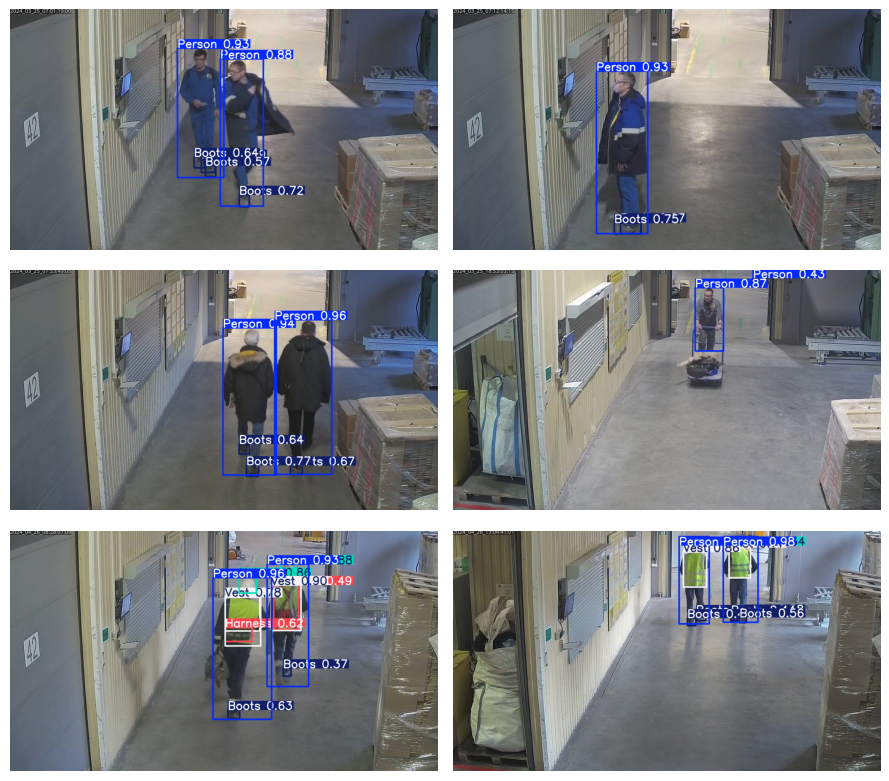

In [ ]:
# Create paths to images.
image_paths = [f'result_foto_{i}.jpg' for i in range(30, 36)]

# Create a grid to display results.
n_cols = 2
n_rows = (len(image_paths) + n_cols - 1) // n_cols
plt.figure(figsize=(9, 8))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

if results_count % n_cols != 0:
    for j in range(n_cols - (results_count % n_cols)):
        plt.subplot(n_rows, n_cols, results_count + j + 1)
        plt.axis('off')

plt.tight_layout()
plt.show()

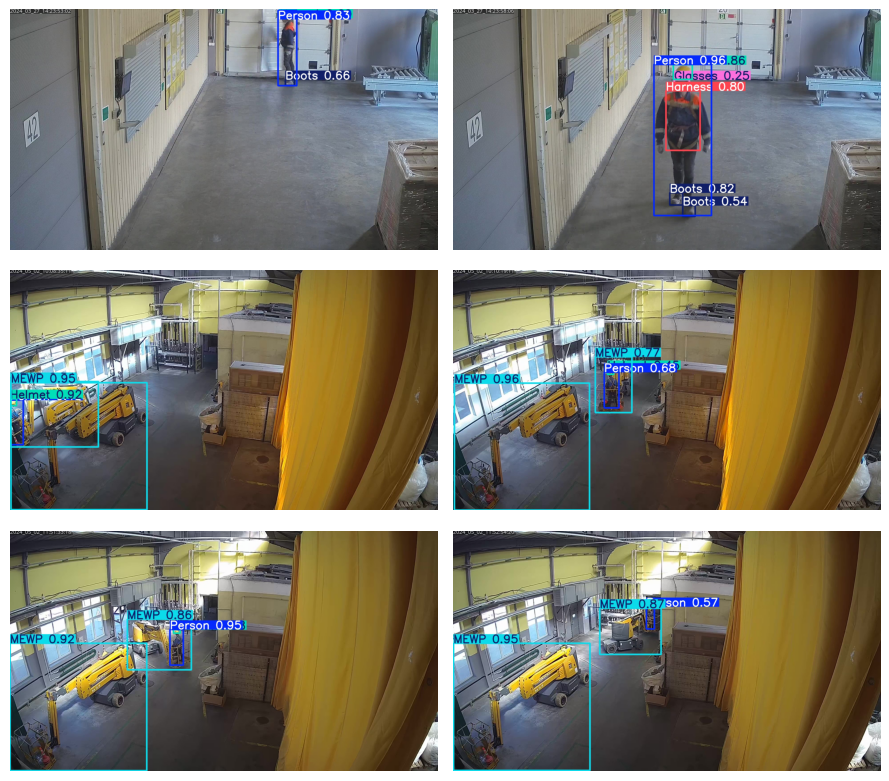

In [ ]:
# Create paths to images.
image_paths = [f'result_foto_{i}.jpg' for i in range(40, 46)]

# Create a grid to display results.
n_cols = 2
n_rows = (len(image_paths) + n_cols - 1) // n_cols
plt.figure(figsize=(9, 8))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

if results_count % n_cols != 0:
    for j in range(n_cols - (results_count % n_cols)):
        plt.subplot(n_rows, n_cols, results_count + j + 1)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Use a trained model to run predictions on video.
results = model('/content/drive/MyDrive/yolo/video/Камера 85_30_10_2024 08.22.41 - Trim.mp4', save=True)

In [ ]:
# Use a trained model to run predictions on video.
results = model('/content/drive/MyDrive/yolo/video/predict2_n.mp4', save=True)

[Predictions on video](https://drive.google.com/drive/folders/1mHct99tpwApv2_b9VHDyd7V6TX9GC_pC?usp=drive_link)

In [ ]:
model.export(format="onnx", half=False, int8=False, device='cpu')

In [ ]:
model.save(filename='/content/drive/MyDrive/yolo/model/ppe_n.pt')

In [13]:
# Unmount Google Drive
drive.flush_and_unmount()

В целом модель справляется с задачей детекции СИЗ в производственных условиях.